In [1]:
# Principal package imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc

# Scikit-learn package imports
from sklearn import feature_extraction, model_selection
from sklearn.metrics import mean_squared_error, roc_auc_score

# PyBKT package imports
from pyBKT.models import Model
# Import the lmm model class
from pymer4.models import Lmer

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

In [2]:
# Load the data from data/subtasks_bkt.pkl
df_subtasks_bkt = pd.read_pickle('data/subtasks_bkt.pkl')
col_names = { "skill" : "skill_name"}
df_subtasks_bkt.rename(columns=col_names, inplace=True)
df_subtasks_bkt.head()

,user_id,skill_name,number_range,correct,start,end,skill_id
subtask_id,,,,,,,
0,2,Number_line,R10,0,2020-08-20T07:13:50.876Z,2020-08-20T07:14:30.108Z,1.00000
1,2,Number_line,R10,1,2020-08-21T07:02:20.112Z,2020-08-21T07:02:36.221Z,3.00000
2,2,Number_line,R10,1,2020-08-24T07:02:59.855Z,2020-08-24T07:03:07.382Z,18.00000
3,2,Number_line,R10,1,2020-08-26T06:47:21.504Z,2020-08-26T06:47:30.050Z,19.00000
4,2,Addition,R20,1,2020-08-26T07:20:58.766Z,2020-08-26T07:21:06.439Z,54.00000


In [3]:
# Load the data from models/fit_1/df_model_skill.pkl
df_model_skill = pd.read_pickle('models/df_model_skill.pkl')
df_model_skill


path  \
skill_name     number_range                                                
Addition       R10                   models/fit_1\model_Addition_R10.pkl   
               R100                 models/fit_1\model_Addition_R100.pkl   
               R1000               models/fit_1\model_Addition_R1000.pkl   
               R20                   models/fit_1\model_Addition_R20.pkl   
Division       R100                 models/fit_1\model_Division_R100.pkl   
               R1000               models/fit_1\model_Division_R1000.pkl   
               R20                   models/fit_1\model_Division_R20.pkl   
Multiplication R100           models/fit_1\model_Multiplication_R100.pkl   
               R1000         models/fit_1\model_Multiplication_R1000.pkl   
               R20             models/fit_1\model_Multiplication_R20.pkl   
Number_line    R10                models/fit_1\model_Number_line_R10.pkl   
               R100              models/fit_1\model_Number_line_R100.pkl   
               R1000            models/fit_1\model_Number_line_R1000.pkl   
               R20                models/fit_1\model_Number_line_R20.pkl   
Subtraction    R10                models/fit_1\model_Subtraction_R10.pkl   
               R100              models/fit_1\model_Subtraction_R100.pkl   
               R1000            models/fit_1\model_Subtraction_R1000.pkl   
               R20                models/fit_1\model_Subtraction_R20.pkl   

                                                                         model  \
skill_name     number_range                                                      
Addition       R10           Model(parallel=True, num_fits=1, seed=0, defau...   
               R100          Model(parallel=True, num_fits=1, seed=0, defau...   
               R1000         Model(parallel=True, num_fits=1, seed=0, defau...   
               R20           Model(parallel=True, num_fits=1, seed=0, defau...   
Division       R100          Model(parallel=True, num_fits=1, seed=0, defau...   
               R1000         Model(parallel=True, num_fits=1, seed=0, defau...   
               R20           Model(parallel=True, num_fits=1, seed=0, defau...   
Multiplication R100          Model(parallel=True, num_fits=1, seed=0, defau...   
               R1000         Model(parallel=True, num_fits=1, seed=0, defau...   
               R20           Model(parallel=True, num_fits=1, seed=0, defau...   
Number_line    R10           Model(parallel=True, num_fits=1, seed=0, defau...   
               R100          Model(parallel=True, num_fits=1, seed=0, defau...   
               R1000         Model(parallel=True, num_fits=1, seed=0, defau...   
               R20           Model(parallel=True, num_fits=1, seed=0, defau...   
Subtraction    R10           Model(parallel=True, num_fits=1, seed=0, defau...   
               R100          Model(parallel=True, num_fits=1, seed=0, defau...   
               R1000         Model(parallel=True, num_fits=1, seed=0, defau...   
               R20           Model(parallel=True, num_fits=1, seed=0, defau...   

                                auc    rmse  
skill_name     number_range                  
Addition       R10          0.56764 0.33962  
               R100         0.63523 0.43403  
               R1000        0.66831 0.43722  
               R20          0.66755 0.39465  
Division       R100         0.70432 0.41409  
               R1000        0.66005 0.46743  
               R20          0.74748 0.40181  
Multiplication R100         0.65547 0.22089  
               R1000        0.56428 0.21138  
               R20          0.72520 0.33631  
Number_line    R10          0.72983 0.42130  
               R100         0.66639 0.41321  
               R1000        0.65136 0.34403  
               R20          0.63500 0.39271  
Subtraction    R10          0.56502 0.41665  
               R100         0.66339 0.45742  
               R1000        0.67780 0.45783  
               R20          0.66

In [4]:
model: Model = df_model_skill.loc['Number_line', 'R10'].model
model.params()

value
skill       param   class          
Number_line prior   default 0.00000
            learns  10      0.00000
                    1000    0.31343
                    10001   0.00013
                    10005   1.00000
...                             ...
            forgets 9986    0.00000
                    9989    0.00000
                    9996    0.00000
                    9997    0.00000
                    9998    0.00000

[68189 rows x 1 columns]

In [5]:
data = df_subtasks_bkt.loc[(df_subtasks_bkt['skill_name'] == 'Number_line') & (df_subtasks_bkt['number_range'] == 'R10')]
data.head()

,user_id,skill_name,number_range,correct,start,end,skill_id
subtask_id,,,,,,,
0,2,Number_line,R10,0,2020-08-20T07:13:50.876Z,2020-08-20T07:14:30.108Z,1.00000
1,2,Number_line,R10,1,2020-08-21T07:02:20.112Z,2020-08-21T07:02:36.221Z,3.00000
2,2,Number_line,R10,1,2020-08-24T07:02:59.855Z,2020-08-24T07:03:07.382Z,18.00000
3,2,Number_line,R10,1,2020-08-26T06:47:21.504Z,2020-08-26T06:47:30.050Z,19.00000
381,2,Number_line,R10,1,2022-09-09T06:44:09.103Z,2022-09-09T06:46:00.449Z,0.00000


In [6]:
predictions = model.predict(data=data)[['user_id', 'skill_name', 'correct', 'correct_predictions']]

In [7]:
predictions.head()

,user_id,skill_name,correct,correct_predictions
subtask_id,,,,
0,2,Number_line,0,0.48435
1,2,Number_line,1,0.87551
2,2,Number_line,1,0.87551
3,2,Number_line,1,0.87551
381,2,Number_line,1,0.87551


In [8]:
msk = predictions.loc[:]['user_id'] == 33
predictions[msk]

,user_id,skill_name,correct,correct_predictions
subtask_id,,,,
1506,33,Number_line,1,0.48435
1507,33,Number_line,1,0.49487
1508,33,Number_line,0,0.51298
1509,33,Number_line,1,0.50199


  0%|          | 0/18 [00:00<?, ?it/s]

##### ('Addition', 'R10') #####
Predicting...
Generating plot...


  6%|▌         | 1/18 [00:04<01:16,  4.51s/it]

##### ('Addition', 'R100') #####
Predicting...
Generating plot...


 11%|█         | 2/18 [00:07<01:02,  3.88s/it]

##### ('Addition', 'R1000') #####
Predicting...
Generating plot...


 17%|█▋        | 3/18 [00:11<00:56,  3.73s/it]

##### ('Addition', 'R20') #####
Predicting...
Generating plot...


 22%|██▏       | 4/18 [00:17<01:06,  4.74s/it]

##### ('Division', 'R100') #####
Predicting...
Generating plot...


 28%|██▊       | 5/18 [00:20<00:50,  3.90s/it]

##### ('Division', 'R1000') #####
Predicting...
Generating plot...


 33%|███▎      | 6/18 [00:22<00:40,  3.34s/it]

##### ('Division', 'R20') #####
Predicting...
Generating plot...


 39%|███▉      | 7/18 [00:26<00:40,  3.65s/it]

##### ('Multiplication', 'R100') #####
Predicting...
Generating plot...


 44%|████▍     | 8/18 [00:37<00:57,  5.75s/it]

##### ('Multiplication', 'R1000') #####
Predicting...
Generating plot...


 50%|█████     | 9/18 [00:43<00:54,  6.05s/it]

##### ('Multiplication', 'R20') #####
Predicting...
Generating plot...


 56%|█████▌    | 10/18 [00:54<00:59,  7.46s/it]

##### ('Number_line', 'R10') #####
Predicting...
Generating plot...


 61%|██████    | 11/18 [02:23<03:46, 32.37s/it]

##### ('Number_line', 'R100') #####
Predicting...
Generating plot...


 67%|██████▋   | 12/18 [05:43<08:20, 83.35s/it]

##### ('Number_line', 'R1000') #####
Predicting...
Generating plot...


 72%|███████▏  | 13/18 [08:28<09:01, 108.25s/it]

##### ('Number_line', 'R20') #####
Predicting...
Generating plot...


 78%|███████▊  | 14/18 [10:12<07:07, 106.96s/it]

##### ('Subtraction', 'R10') #####
Predicting...
Generating plot...


 83%|████████▎ | 15/18 [10:16<03:47, 75.92s/it] 

##### ('Subtraction', 'R100') #####
Predicting...
Generating plot...


 89%|████████▉ | 16/18 [10:22<01:49, 54.91s/it]

##### ('Subtraction', 'R1000') #####
Predicting...
Generating plot...


 94%|█████████▍| 17/18 [10:27<00:39, 39.72s/it]

##### ('Subtraction', 'R20') #####
Predicting...
Generating plot...


100%|██████████| 18/18 [10:36<00:00, 35.35s/it]


Done !


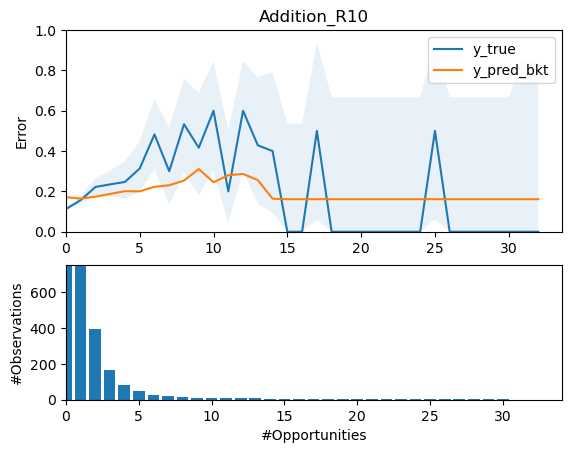

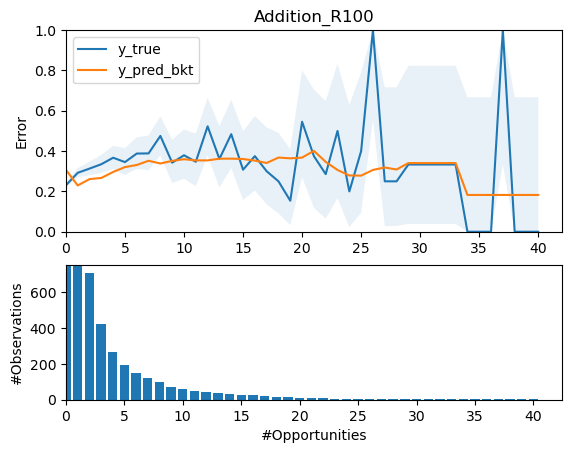

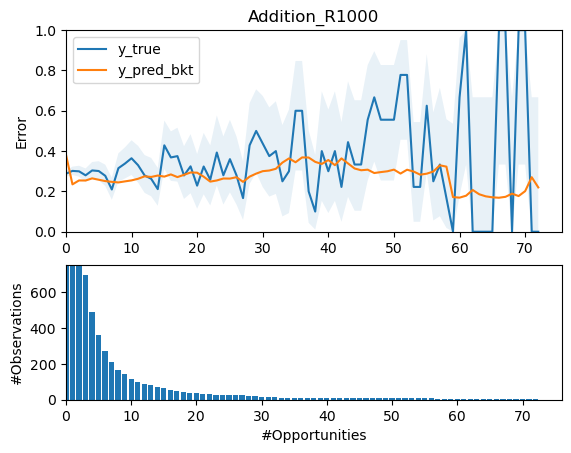

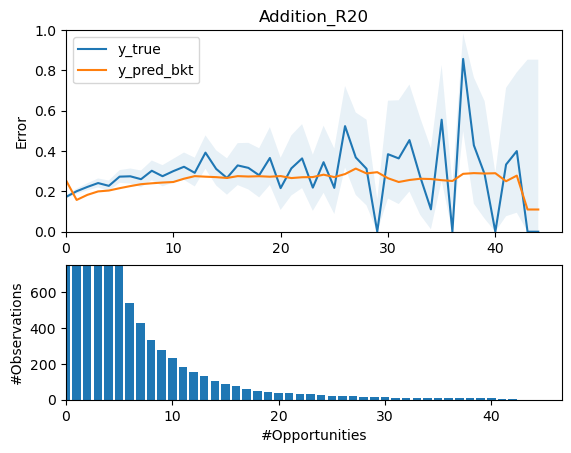

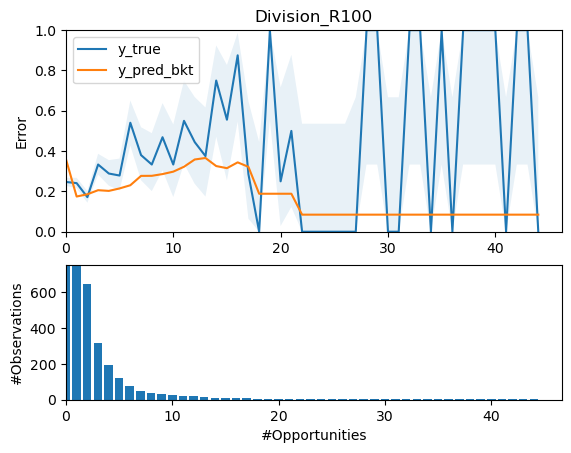

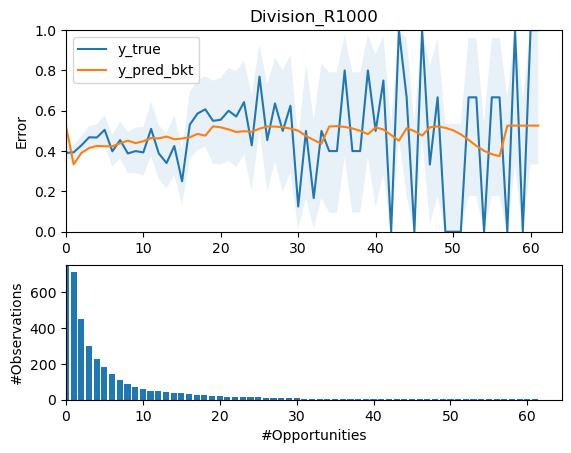

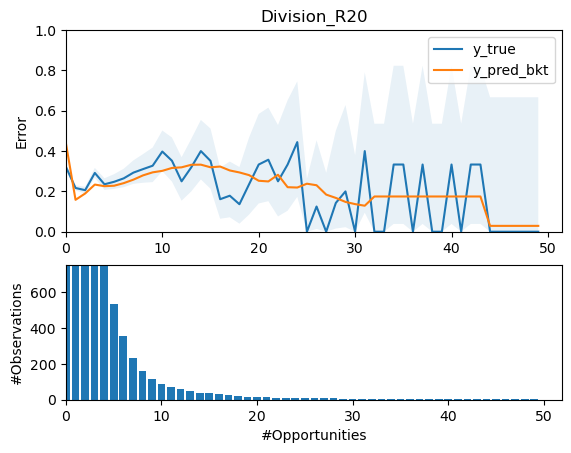

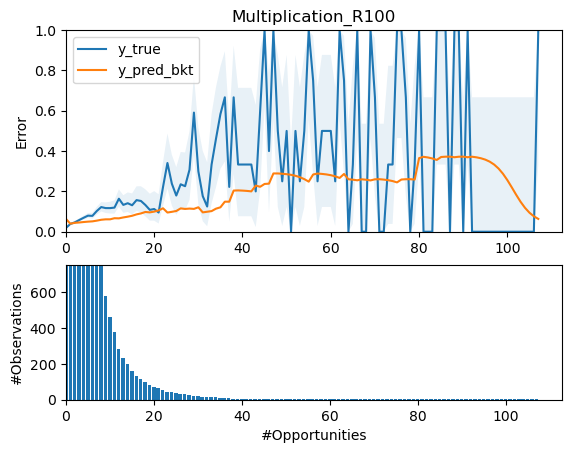

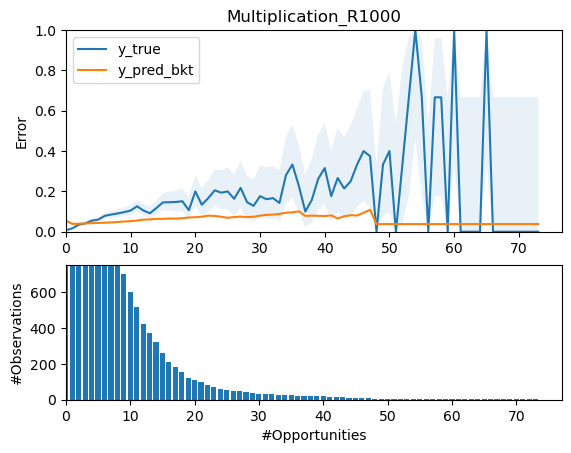

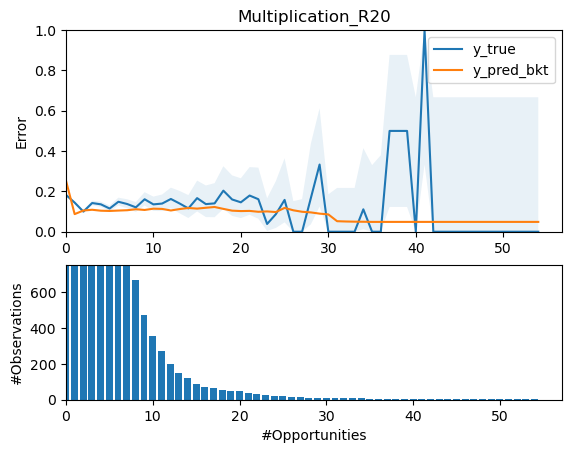

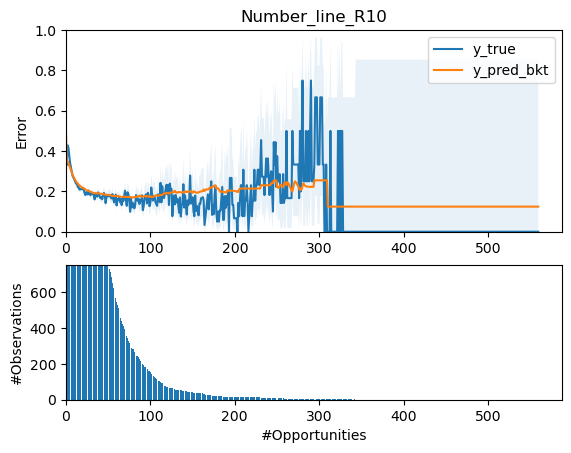

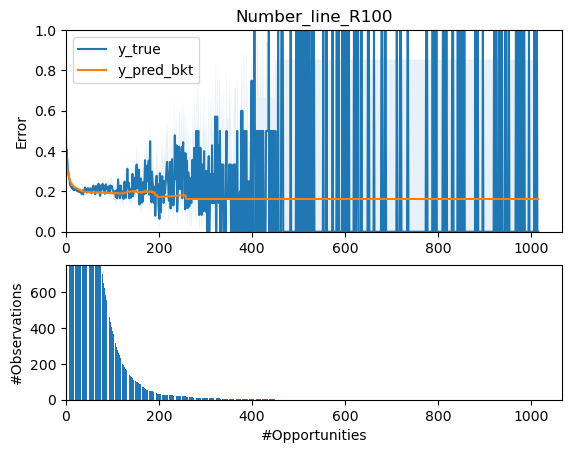

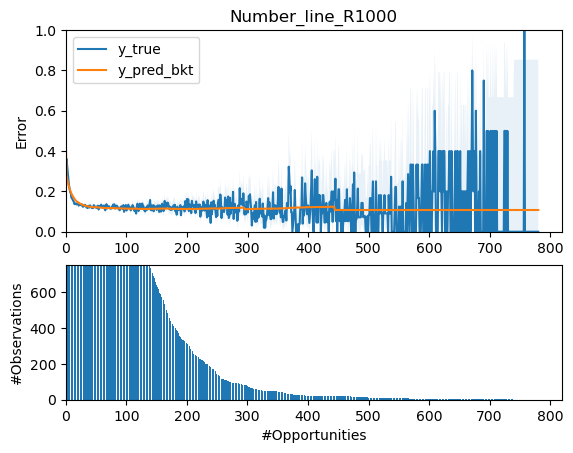

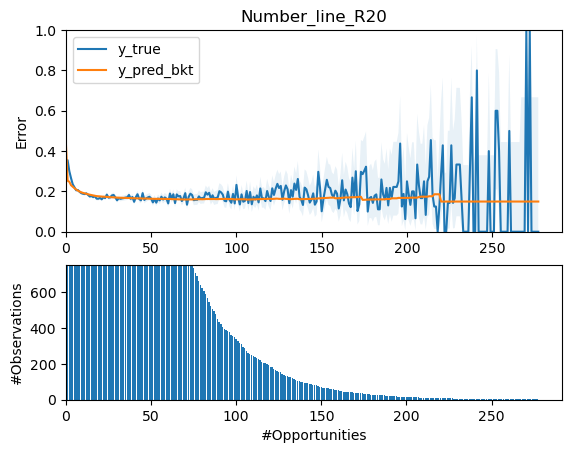

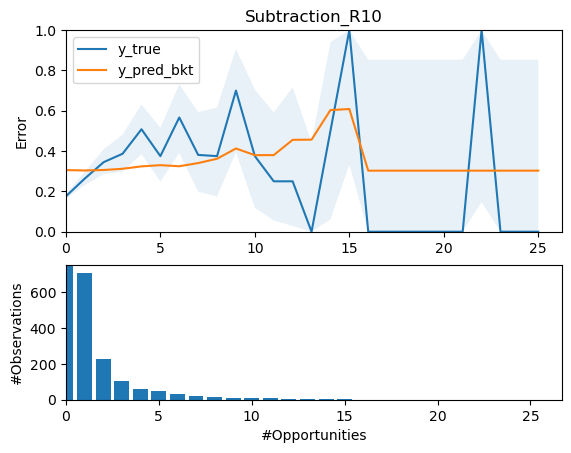

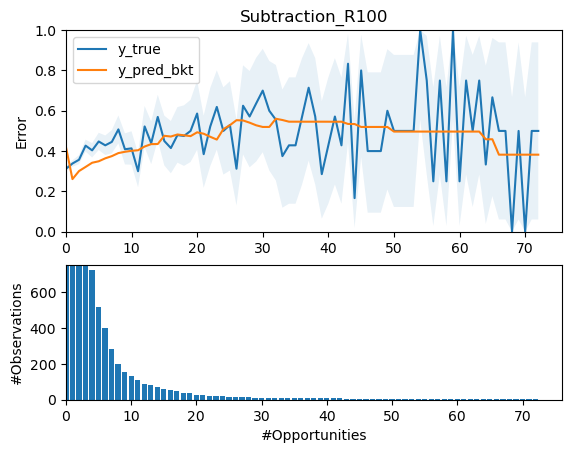

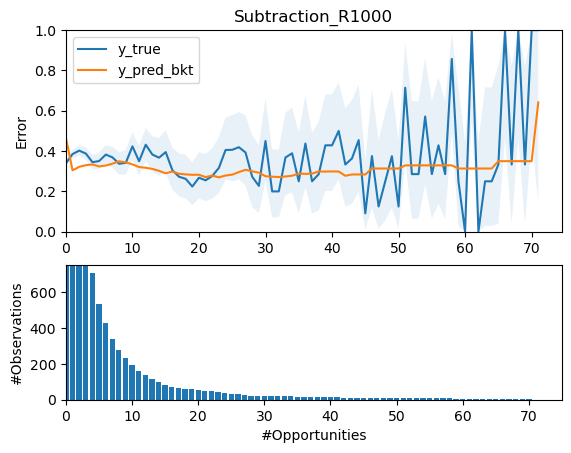

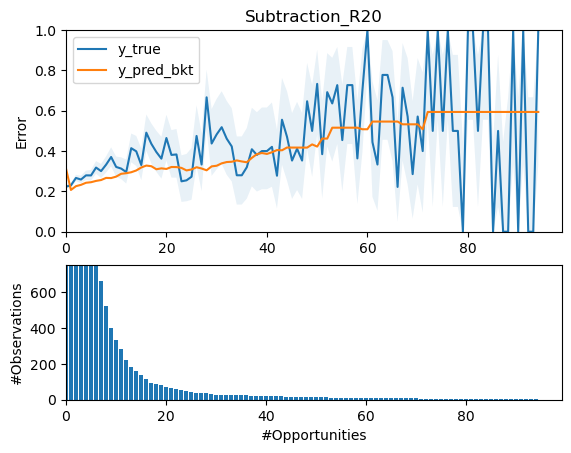

In [20]:
from learning_curves import plot_learning_curve, get_data
from tqdm import tqdm

def models_to_curves(df_subtasks_bkt: pd.DataFrame, df_model_skills: pd.DataFrame):
    
    # Iterate over the df_model_skills index and show progress bar
    for skill in tqdm(df_model_skills.index):
        print(f'##### {skill} #####')
        skill_name, number_range = skill
        model: Model = df_model_skills.loc[skill].model
        data = get_data(df_subtasks_bkt, skill_name, number_range)
        
        # Log predicting with loading 
        
        print(f'Predicting...')
        predictions = model.predict(data=data)[['user_id', 'skill_name', 'correct', 'correct_predictions']]
        predictions.columns = ['user_id', 'skill_name', 'y_true', 'y_pred_bkt']
        
        # Log generating plot..
        print(f'Generating plot...')
        plot_learning_curve(skill_name, number_range, predictions)
    
    print('Done !')
        
        
    
models_to_curves(df_subtasks_bkt, df_model_skill)